In [5]:
import pandas as pd
import os

# 1. 병합할 경로 지정
base_path = "C:/Users/HR/Desktop/workspace/파이널프로젝트/open/train/1.회원정보"
months = ['07', '08', '09', '10', '11', '12']
file_paths = [os.path.join(base_path, f"2018{month}_train_회원정보.parquet") for month in months]

# 2. 병합 리스트
df_list = []
for path in file_paths:
    df = pd.read_parquet(path)
    df['기준년월'] = os.path.basename(path).split('_')[0]  # 기준년월 컬럼 추가
    df_list.append(df)

# 3. 병합 수행
merged_df = pd.concat(df_list, ignore_index=True)

# 4. 결과 확인
print("병합된 데이터프레임 크기:", merged_df.shape)
print("컬럼 목록:")
print(merged_df.columns.tolist())


병합된 데이터프레임 크기: (2400000, 78)
컬럼 목록:
['기준년월', 'ID', '남녀구분코드', '연령', 'Segment', '회원여부_이용가능', '회원여부_이용가능_CA', '회원여부_이용가능_카드론', '소지여부_신용', '소지카드수_유효_신용', '소지카드수_이용가능_신용', '입회일자_신용', '입회경과개월수_신용', '회원여부_연체', '이용거절여부_카드론', '동의여부_한도증액안내', '수신거부여부_TM', '수신거부여부_DM', '수신거부여부_메일', '수신거부여부_SMS', '가입통신회사코드', '탈회횟수_누적', '최종탈회후경과월', '탈회횟수_발급6개월이내', '탈회횟수_발급1년이내', '거주시도명', '직장시도명', '마케팅동의여부', '유효카드수_신용체크', '유효카드수_신용', '유효카드수_신용_가족', '유효카드수_체크', '유효카드수_체크_가족', '이용가능카드수_신용체크', '이용가능카드수_신용', '이용가능카드수_신용_가족', '이용가능카드수_체크', '이용가능카드수_체크_가족', '이용카드수_신용체크', '이용카드수_신용', '이용카드수_신용_가족', '이용카드수_체크', '이용카드수_체크_가족', '이용금액_R3M_신용체크', '이용금액_R3M_신용', '이용금액_R3M_신용_가족', '이용금액_R3M_체크', '이용금액_R3M_체크_가족', '_1순위카드이용금액', '_1순위카드이용건수', '_1순위신용체크구분', '_2순위카드이용금액', '_2순위카드이용건수', '_2순위신용체크구분', '최종유효년월_신용_이용가능', '최종유효년월_신용_이용', '최종카드발급일자', '보유여부_해외겸용_본인', '이용가능여부_해외겸용_본인', '이용여부_3M_해외겸용_본인', '보유여부_해외겸용_신용_본인', '이용가능여부_해외겸용_신용_본인', '이용여부_3M_해외겸용_신용_본인', '연회비발생카드수_B0M', '연회비할인카드수_B0M', '기본연회비_B0M', '제휴연회비_B0M', '할인금액_기본연회비_B0M', '할

In [6]:
from sklearn.preprocessing import LabelEncoder

# 1. 복사본 생성 (원본 보존하고 싶을 경우)
encoded_df = merged_df.copy()

# 2. 문자형 컬럼을 Label Encoding
for col in encoded_df.columns:
    if encoded_df[col].dtype == 'object' or encoded_df[col].dtype.name == 'category':
        encoded_df[col] = LabelEncoder().fit_transform(encoded_df[col].astype(str))

# 3. 확인
print("문자형 → 수치형 변환 완료")
print("변환된 데이터 타입:")
print(encoded_df.dtypes.value_counts())


문자형 → 수치형 변환 완료
변환된 데이터 타입:
int64      60
int32      15
float64     3
Name: count, dtype: int64


In [7]:
# 1. 표준편차 0인 컬럼 제거
std_0_cols = encoded_df.columns[encoded_df.std() == 0].tolist()
print("표준편차 0인 컬럼:", std_0_cols)
encoded_df = encoded_df.drop(columns=std_0_cols)

# 2. 결측치 비율 30% 이상 컬럼 제거
null_ratio = encoded_df.isnull().mean()
high_null_cols = null_ratio[null_ratio > 0.3].index.tolist()
print("결측치 비율 > 30% 컬럼:", high_null_cols)
encoded_df = encoded_df.drop(columns=high_null_cols)

# 3. 결과 요약
print("✅ 정리된 컬럼 수:", encoded_df.shape[1])


표준편차 0인 컬럼: ['이용카드수_체크_가족', '이용금액_R3M_체크_가족', '연회비할인카드수_B0M', '할인금액_기본연회비_B0M', '할인금액_제휴연회비_B0M', '상품관련면제카드수_B0M', '임직원면제카드수_B0M', '우수회원면제카드수_B0M', '기타면제카드수_B0M']
결측치 비율 > 30% 컬럼: []
✅ 정리된 컬럼 수: 69


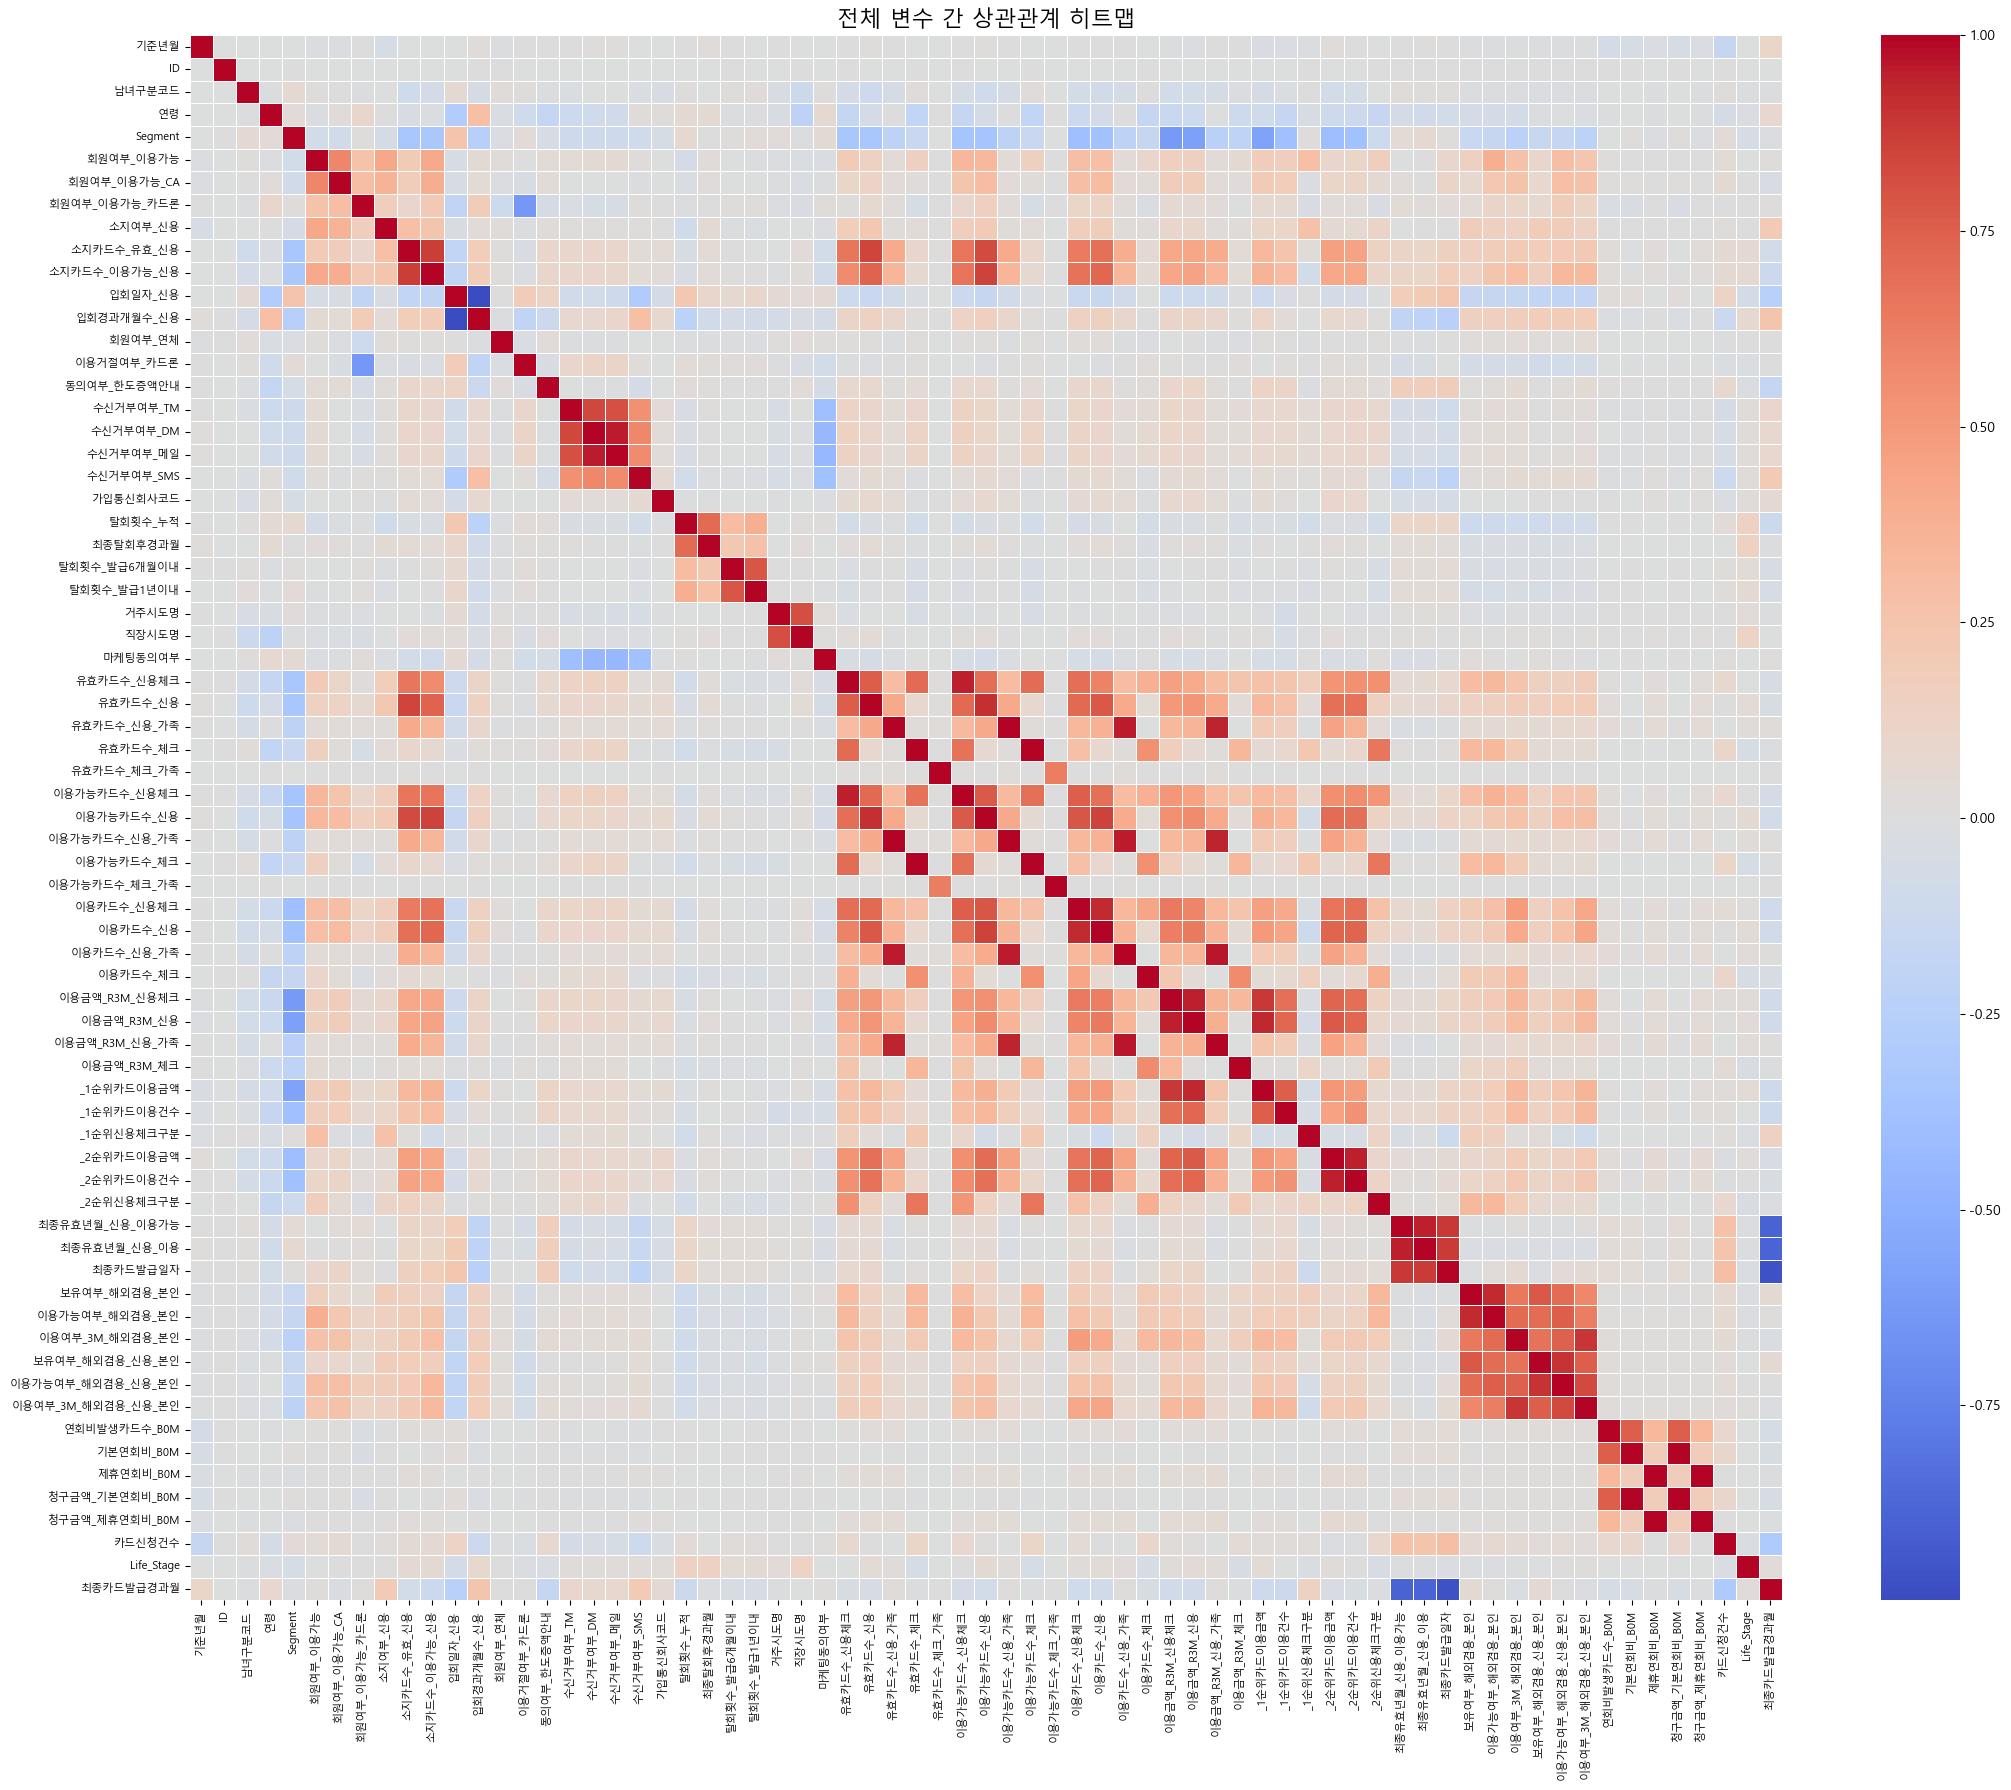

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# 1. 상관계수 계산
corr_matrix = encoded_df.corr()

# 2. 한글 폰트 설정 (윈도우 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

# 3. 히트맵 시각화
plt.figure(figsize=(22, 18))  # 넓고 크게
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    center=0,
    square=False,
    cbar=True,
    linewidths=0.5
)

plt.title("전체 변수 간 상관관계 히트맵", fontsize=16)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()


In [41]:
# 1. 절댓값 기준으로 상관계수 추출
threshold = 0.5
corr_pairs = corr_matrix.abs().unstack()

# 2. 자기 자신과의 상관 (항상 1) 제거
corr_pairs = corr_pairs[corr_pairs < 1]

# 3. 중복 쌍 제거 (A-B, B-A)
corr_pairs = corr_pairs.drop_duplicates()

# 4. 0.3 이상 필터링
strong_corr = corr_pairs[corr_pairs >= threshold].sort_values(ascending=False)

# 5. 결과 확인
print("상관계수 0.5 이상인 변수쌍 개수:", strong_corr.shape[0])
print(strong_corr)


상관계수 0.5 이상인 변수쌍 개수: 118
입회일자_신용       입회경과개월수_신용        0.999016
유효카드수_신용_가족   이용가능카드수_신용_가족     0.995695
유효카드수_체크      이용가능카드수_체크        0.994470
최종카드발급일자      최종카드발급경과월         0.969271
이용카드수_신용_가족   이용금액_R3M_신용_가족    0.962939
                                  ...   
유효카드수_신용      이용금액_R3M_신용       0.522188
이용가능카드수_신용체크  _2순위신용체크구분        0.519205
_1순위카드이용금액    _2순위카드이용금액        0.512866
이용가능카드수_신용체크  이용금액_R3M_신용체크     0.508681
유효카드수_신용      이용금액_R3M_신용체크     0.503858
Length: 118, dtype: float64


In [16]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager

# 윈도우 사용자용 - Malgun Gothic 설치돼 있다고 가정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 말굿고딕 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()

plt.rcParams['font.family'] = font_name
mpl.rcParams['axes.unicode_minus'] = False


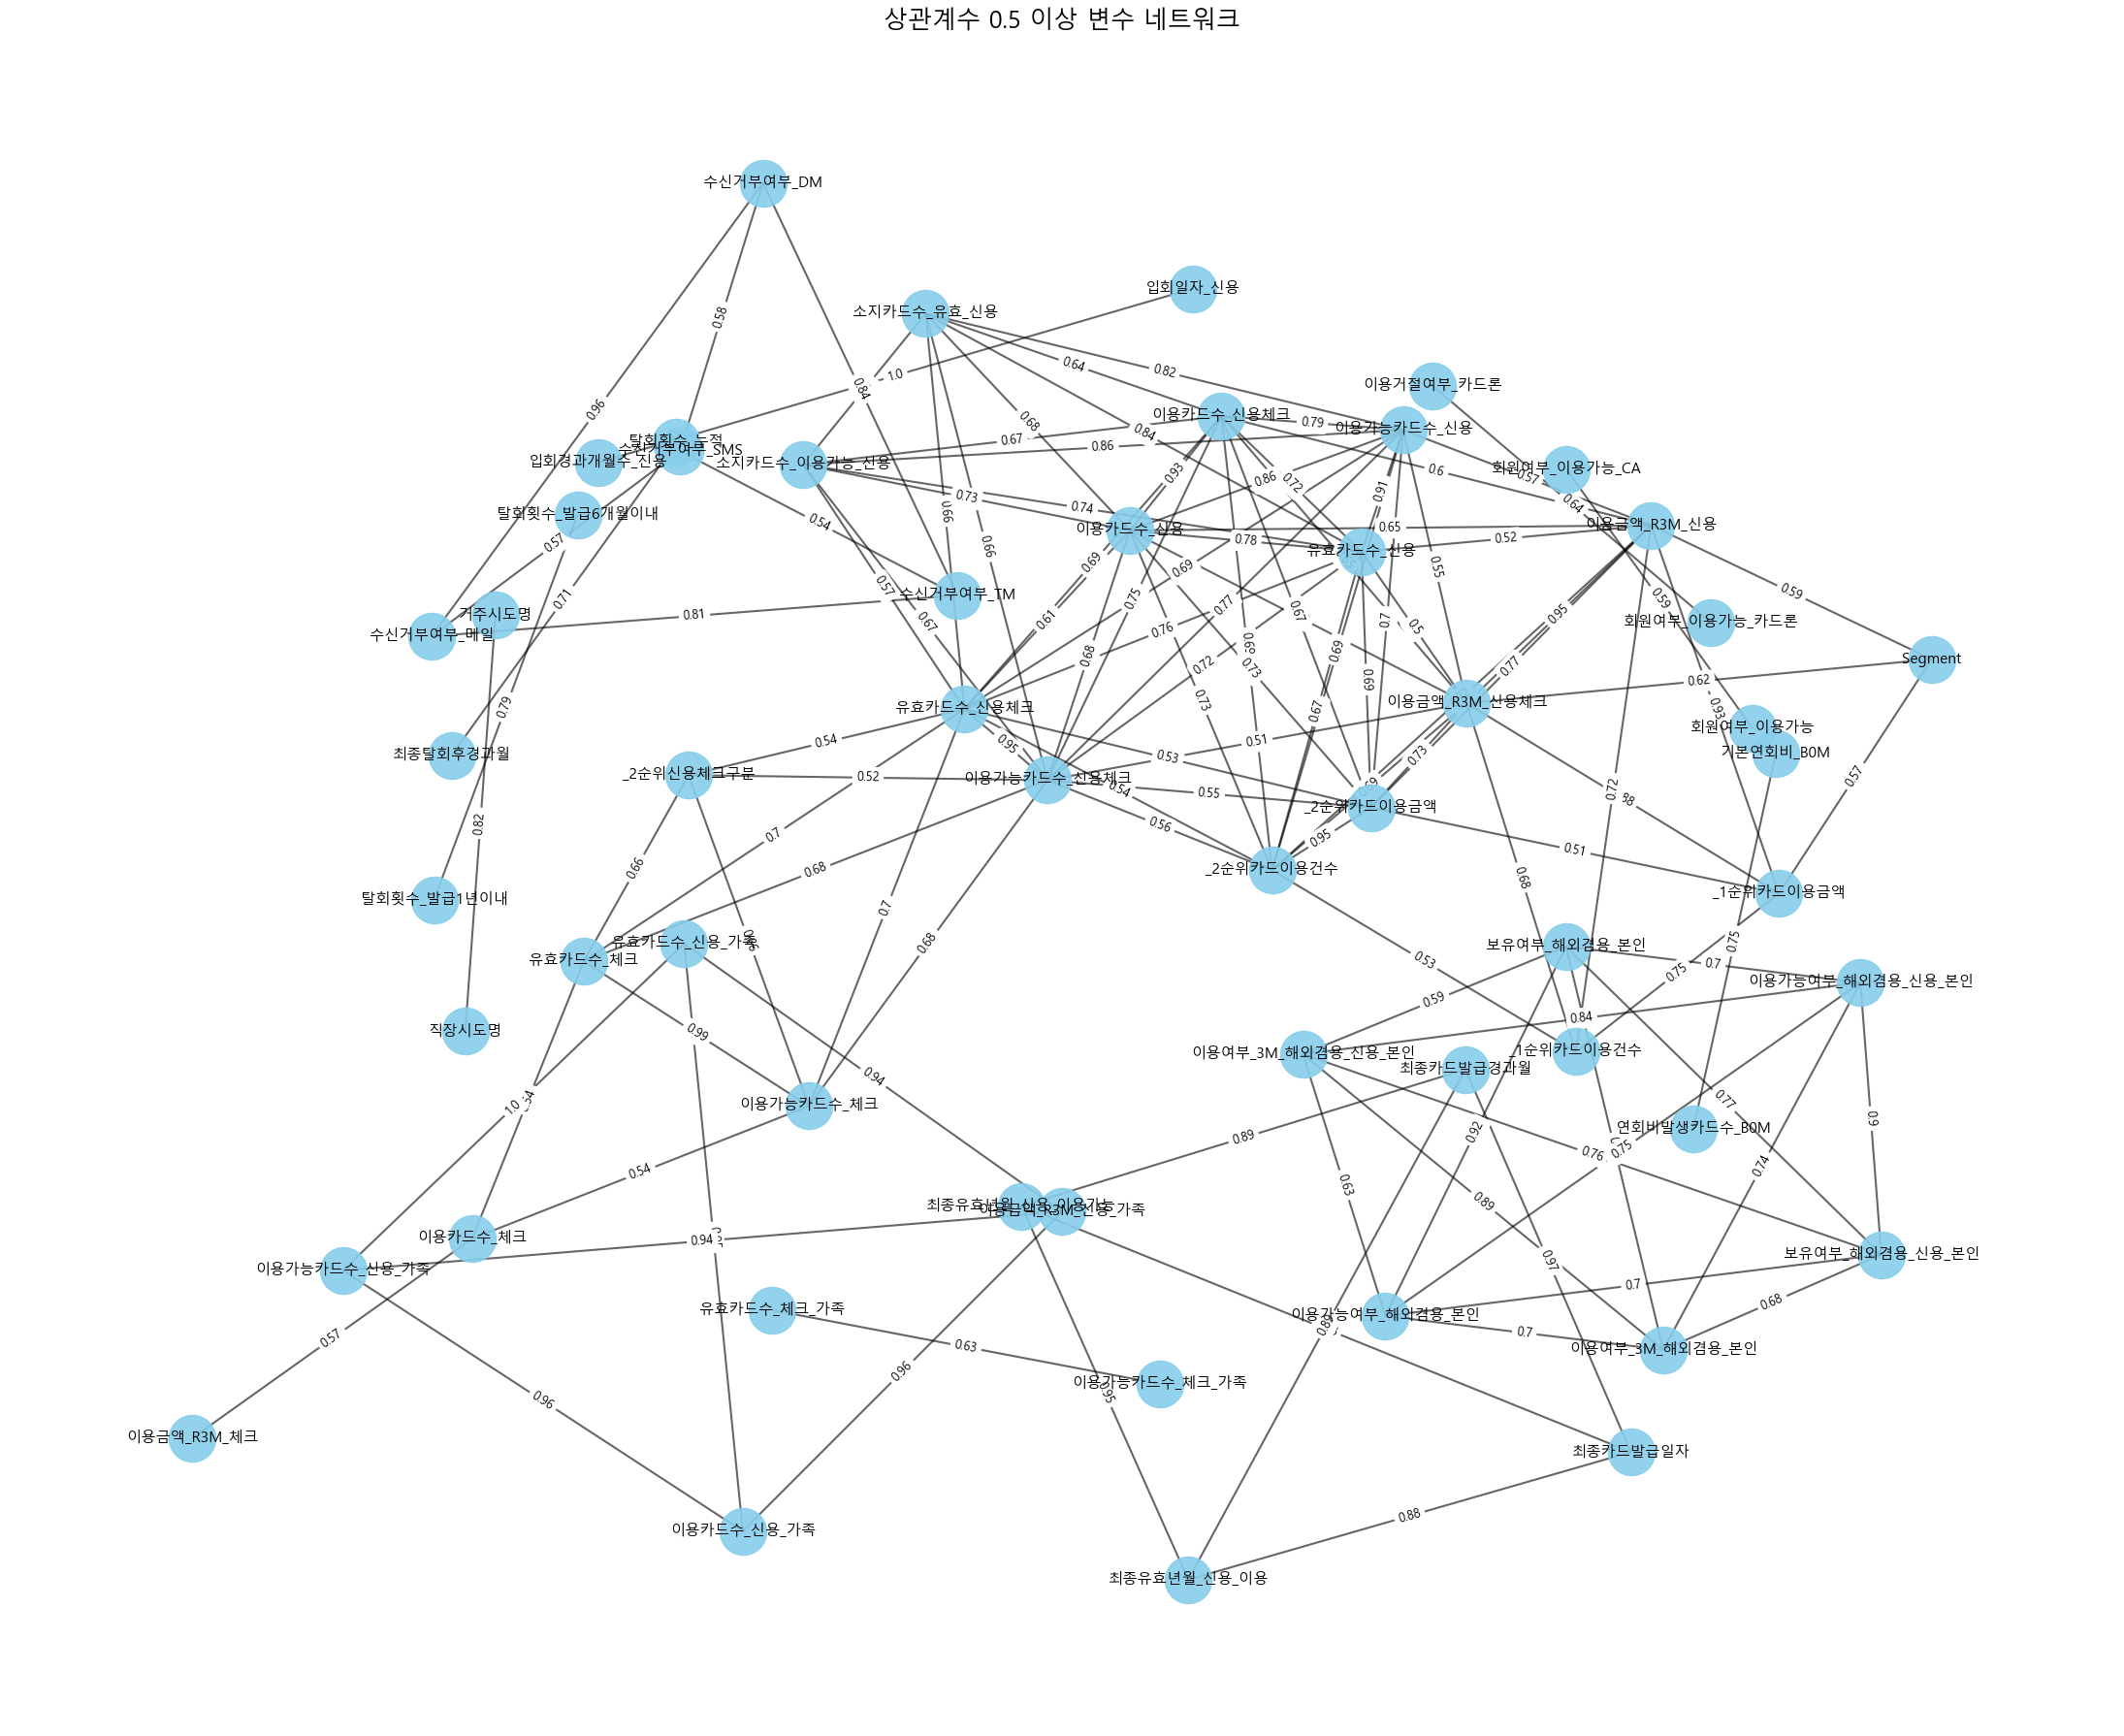

In [21]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager

# 1. 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = font_manager.FontProperties(fname=font_path).get_name()
plt.rcParams['font.family'] = font_prop
mpl.rcParams['axes.unicode_minus'] = False

# 2. 상관계수 0.5이상 페어 추출
threshold = 0.5
corr_pairs = corr_matrix.abs().unstack()
corr_pairs = corr_pairs[corr_pairs < 1].drop_duplicates()
strong_corr = corr_pairs[corr_pairs >= threshold]

# 3. 그래프 생성
G = nx.Graph()
for (var1, var2), corr in strong_corr.items():
    G.add_edge(var1, var2, weight=round(corr, 2))

# 4. 가독성 향상: 배치 조정, 폰트/간격 확대
plt.figure(figsize=(22, 18))
pos = nx.kamada_kawai_layout(G)  # 🔸 거리 기반 균형 배치

# 노드 그리기
nx.draw_networkx_nodes(G, pos, node_size=1200, node_color='skyblue', alpha=0.9)
nx.draw_networkx_edges(G, pos, width=1.5, alpha=0.6)

# 텍스트 가독성 개선
nx.draw_networkx_labels(G, pos, font_size=11, font_family=font_prop)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9, font_family=font_prop)

plt.title("상관계수 0.5 이상 변수 네트워크", fontsize=18, fontname=font_prop)
plt.axis('off')
plt.tight_layout()
plt.show()


In [25]:
# 1. Segment와 상관계수 ≥ 0.인 변수들만 추출
segment_corr = corr_matrix['Segment'].drop('Segment')  # 자기 자신 제거
segment_related = segment_corr[segment_corr.abs() >= 0.5]

# 2. 결과 확인
print("Segment와 상관관계 ≥ 0.5 변수 목록:")
print(segment_related.sort_values(ascending=False))


Segment와 상관관계 ≥ 0.5 변수 목록:
_1순위카드이용금액      -0.573870
이용금액_R3M_신용     -0.589032
이용금액_R3M_신용체크   -0.622827
Name: Segment, dtype: float64


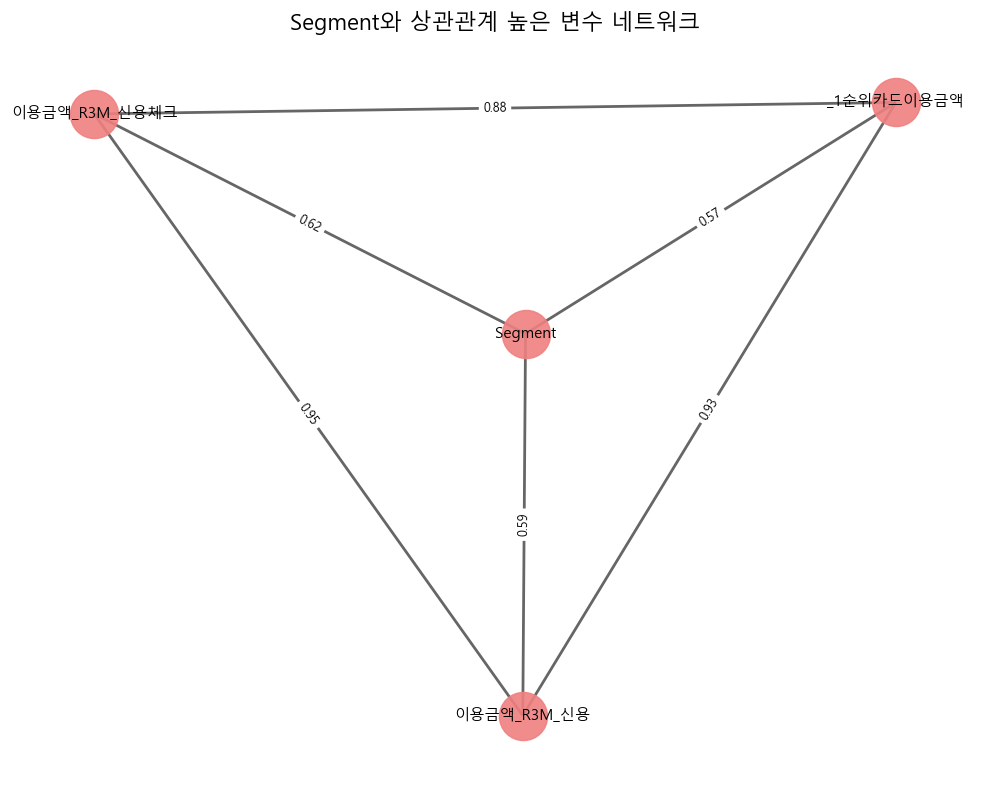

In [27]:
# 3. Segment와 직접 연결된 변수 리스트
segment_nodes = ['Segment'] + segment_related.index.tolist()

# 4. 전체 그래프에서 서브그래프 생성
G_sub = G.subgraph(segment_nodes)

# 5. 그래프 시각화 (Segment 중심 서브그래프)
plt.figure(figsize=(10, 8))
pos = nx.kamada_kawai_layout(G_sub)

nx.draw_networkx_nodes(G_sub, pos, node_size=1200, node_color='lightcoral', alpha=0.9)
nx.draw_networkx_edges(G_sub, pos, width=2, alpha=0.6)
nx.draw_networkx_labels(G_sub, pos, font_size=11, font_family=font_prop)

edge_labels = nx.get_edge_attributes(G_sub, 'weight')
nx.draw_networkx_edge_labels(G_sub, pos, edge_labels=edge_labels, font_size=9, font_family=font_prop)

plt.title("Segment와 상관관계 높은 변수 네트워크", fontsize=16, fontname=font_prop)
plt.axis('off')
plt.tight_layout()
plt.show()


In [28]:
# Segment와 다른 모든 변수와의 상관계수 (절댓값 순 정렬)
segment_corr_all = corr_matrix['Segment'].drop('Segment').sort_values(key=lambda x: x.abs(), ascending=False)

# 확인
print("Segment와 직접 연결된 전체 변수 상관계수:")
print(segment_corr_all)


Segment와 직접 연결된 전체 변수 상관계수:
이용금액_R3M_신용체크   -6.228267e-01
이용금액_R3M_신용     -5.890316e-01
_1순위카드이용금액      -5.738702e-01
_2순위카드이용금액      -4.002250e-01
이용카드수_신용체크      -3.977127e-01
                     ...     
유효카드수_체크_가족     -4.450207e-03
최종탈회후경과월         1.823105e-03
ID               1.218077e-03
이용가능카드수_체크_가족   -1.137176e-03
기준년월            -4.246192e-14
Name: Segment, Length: 68, dtype: float64


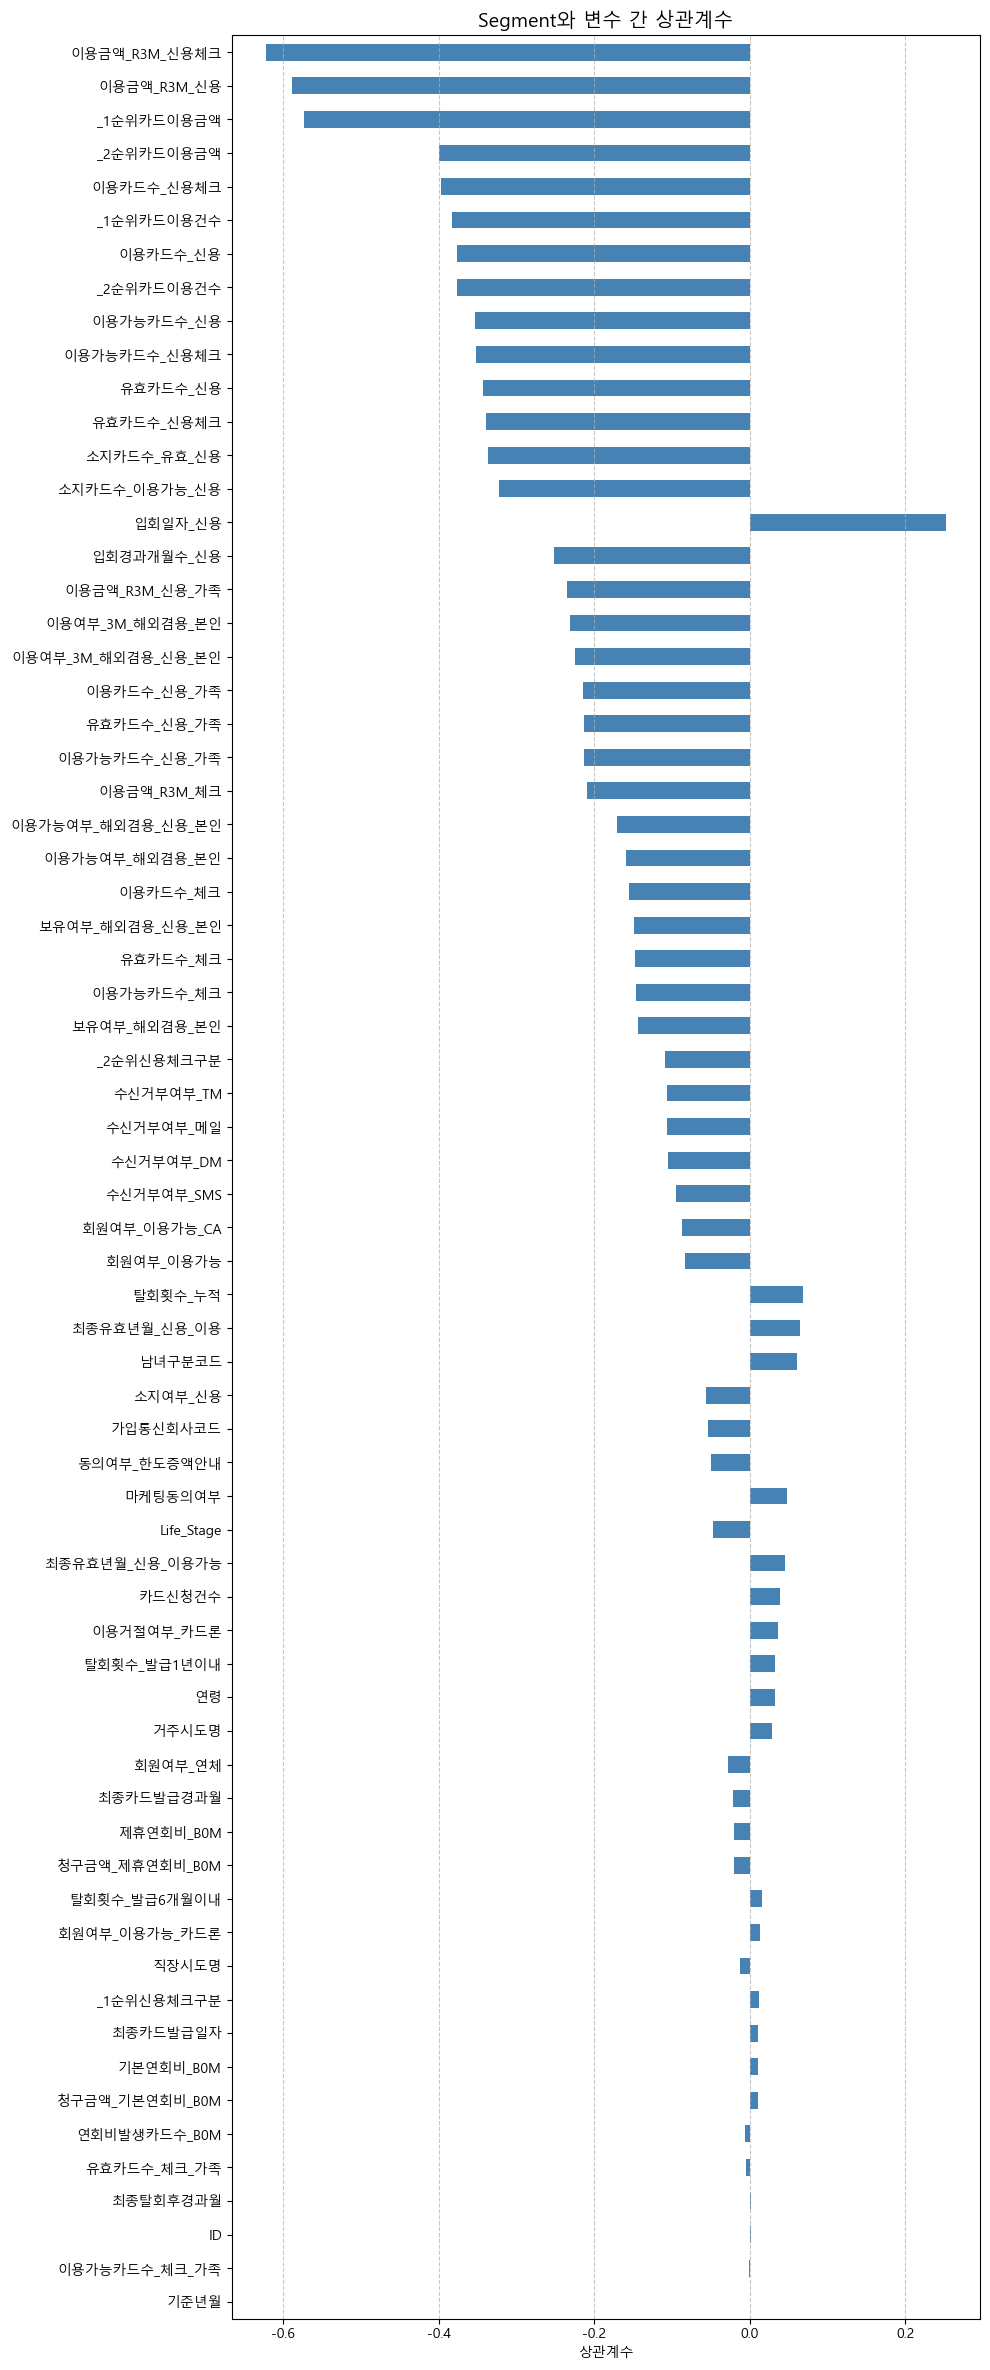

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, len(segment_corr_all) * 0.35))
segment_corr_all.plot(kind='barh', color='steelblue')
plt.title("Segment와 변수 간 상관계수", fontsize=14, fontname=font_prop)
plt.xlabel("상관계수")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()  # 높은 값이 위로 오도록

plt.tight_layout()
plt.show()


In [31]:
import numpy as np

# 1. 상관계수 기준 대표 변수 선정
threshold = 0.9
corr_matrix_abs = corr_matrix.abs()

# 2. 상삼각 행렬만 남기기
upper_triangle = corr_matrix_abs.where(~np.tril(np.ones(corr_matrix_abs.shape)).astype(bool))

# 3. 상관계수 높은 쌍 추출
high_corr_pairs = [
    (col, idx)
    for col in upper_triangle.columns
    for idx in upper_triangle.index
    if pd.notnull(upper_triangle.loc[idx, col]) and upper_triangle.loc[idx, col] >= threshold
]

# 4. 제거할 변수 집합 정의
remove_set = set()
for var1, var2 in high_corr_pairs:
    if abs(corr_matrix['Segment'][var1]) >= abs(corr_matrix['Segment'][var2]):
        remove_set.add(var2)
    else:
        remove_set.add(var1)

# 5. 최종 대표 변수 리스트
representative_vars = [col for col in encoded_df.columns if col not in remove_set]
print("대표 변수 개수:", len(representative_vars))
print("대표 변수 목록:")
print(representative_vars)



대표 변수 개수: 51
대표 변수 목록:
['기준년월', 'ID', '남녀구분코드', '연령', 'Segment', '회원여부_이용가능', '회원여부_이용가능_CA', '회원여부_이용가능_카드론', '소지여부_신용', '소지카드수_유효_신용', '소지카드수_이용가능_신용', '입회일자_신용', '회원여부_연체', '이용거절여부_카드론', '동의여부_한도증액안내', '수신거부여부_TM', '수신거부여부_메일', '수신거부여부_SMS', '가입통신회사코드', '탈회횟수_누적', '최종탈회후경과월', '탈회횟수_발급6개월이내', '탈회횟수_발급1년이내', '거주시도명', '직장시도명', '마케팅동의여부', '유효카드수_체크', '유효카드수_체크_가족', '이용가능카드수_신용체크', '이용가능카드수_신용', '이용가능카드수_체크_가족', '이용카드수_신용체크', '이용카드수_체크', '이용금액_R3M_신용체크', '이용금액_R3M_신용_가족', '이용금액_R3M_체크', '_1순위카드이용건수', '_1순위신용체크구분', '_2순위카드이용금액', '_2순위신용체크구분', '최종유효년월_신용_이용', '이용가능여부_해외겸용_본인', '이용여부_3M_해외겸용_본인', '이용가능여부_해외겸용_신용_본인', '이용여부_3M_해외겸용_신용_본인', '연회비발생카드수_B0M', '청구금액_기본연회비_B0M', '청구금액_제휴연회비_B0M', '카드신청건수', 'Life_Stage', '최종카드발급경과월']


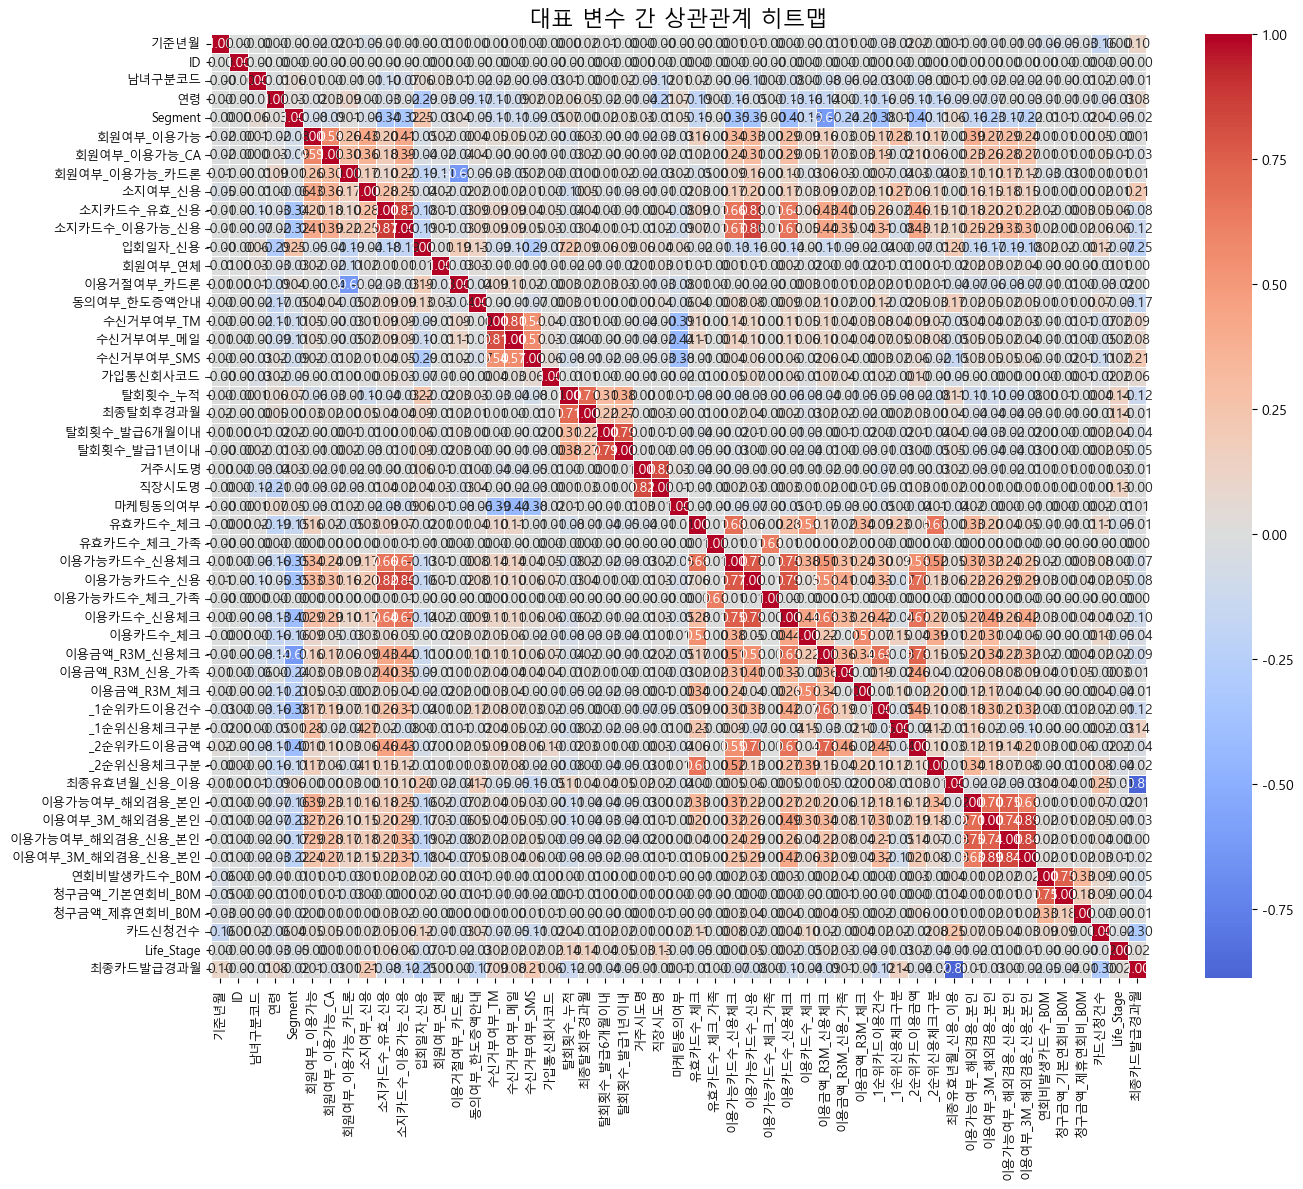

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 대표 변수만 추출
rep_df = encoded_df[representative_vars]

# 2. 상관계수 계산
rep_corr = rep_df.corr()

# 3. 히트맵 시각화
plt.figure(figsize=(14, 12))
sns.heatmap(rep_corr, annot=True, fmt=".2f", cmap="coolwarm", center=0,
            linewidths=0.5, square=False, cbar=True)

plt.title("대표 변수 간 상관관계 히트맵", fontsize=16, fontname=font_prop)
plt.xticks(rotation=90, fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.show()


##Grouping

In [39]:
#[Step 0] 대표변수 → 자동 그룹핑 함수 + grouped_vars 저장

def auto_group_vars(var_list):
    groups = {
        '기본정보': ['기준년월', 'ID', '남녀구분코드', '연령', 'Segment'],
        '회원정보': ['회원여부', '입회일자', '소지', '가입통신회사', '탈회', '최종탈회'],
        '수신동의': ['수신거부여부', '마케팅동의여부'],
        '카드정보': ['유효카드수', '이용가능카드수', '이용카드수', '_1순위', '_2순위'],
        '이용정보': ['이용금액', '이용여부', '이용가능여부'],
        '연회비정보': ['연회비', '청구금액_기본연회비', '청구금액_제휴연회비'],
        '기타': ['카드신청건수', 'Life_Stage']
    }

    group_map = []
    for var in var_list:
        matched = False
        for group, keywords in groups.items():
            if any(keyword in var for keyword in keywords):
                group_map.append({'변수명': var, '그룹': group})
                matched = True
                break
        if not matched:
            group_map.append({'변수명': var, '그룹': '기타'})
    
    return pd.DataFrame(group_map)

# 대표 변수 리스트
rep_vars = ['기준년월', 'ID', '남녀구분코드', '연령', 'Segment', '회원여부_이용가능', '회원여부_이용가능_CA',
            '회원여부_이용가능_카드론', '소지여부_신용', '소지카드수_유효_신용', '소지카드수_이용가능_신용',
            '입회일자_신용', '회원여부_연체', '이용거절여부_카드론', '동의여부_한도증액안내',
            '수신거부여부_TM', '수신거부여부_메일', '수신거부여부_SMS', '가입통신회사코드',
            '탈회횟수_누적', '최종탈회후경과월', '탈회횟수_발급6개월이내', '탈회횟수_발급1년이내',
            '거주시도명', '직장시도명', '마케팅동의여부', '유효카드수_체크', '유효카드수_체크_가족',
            '이용가능카드수_신용체크', '이용가능카드수_신용', '이용가능카드수_체크_가족',
            '이용카드수_신용체크', '이용카드수_체크', '이용금액_R3M_신용체크', '이용금액_R3M_신용_가족',
            '이용금액_R3M_체크', '_1순위카드이용건수', '_1순위신용체크구분', '_2순위카드이용금액',
            '_2순위신용체크구분', '최종유효년월_신용_이용', '이용가능여부_해외겸용_본인',
            '이용여부_3M_해외겸용_본인', '이용가능여부_해외겸용_신용_본인', '이용여부_3M_해외겸용_신용_본인',
            '연회비발생카드수_B0M', '청구금액_기본연회비_B0M', '청구금액_제휴연회비_B0M',
            '카드신청건수', 'Life_Stage', '최종카드발급경과월']

# 그룹 정보 저장
grouped_vars = auto_group_vars(rep_vars)

# ✅ Step 3: 결과 미리보기
print("그룹별 변수 개수 요약:")
print(grouped_vars['그룹'].value_counts())

print("\n 예시:")
display(grouped_vars.head(10))  # 상위 10개 예시 보기


그룹별 변수 개수 요약:
그룹
회원정보     13
카드정보     11
기타        8
이용정보      7
기본정보      5
수신동의      4
연회비정보     3
Name: count, dtype: int64

 예시:


,변수명,그룹
0,기준년월,기본정보
1,ID,기본정보
2,남녀구분코드,기본정보
3,연령,기본정보
4,Segment,기본정보
5,회원여부_이용가능,회원정보
6,회원여부_이용가능_CA,회원정보
7,회원여부_이용가능_카드론,회원정보
8,소지여부_신용,회원정보
9,소지카드수_유효_신용,회원정보


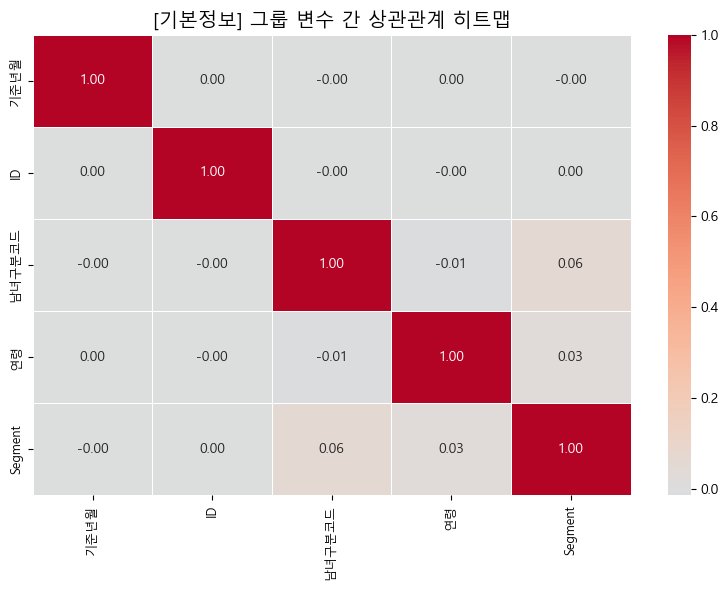

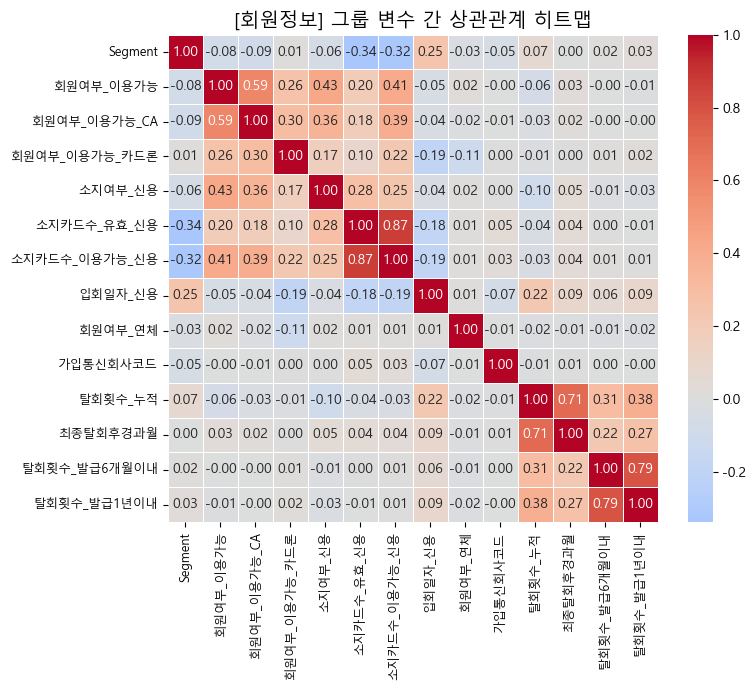

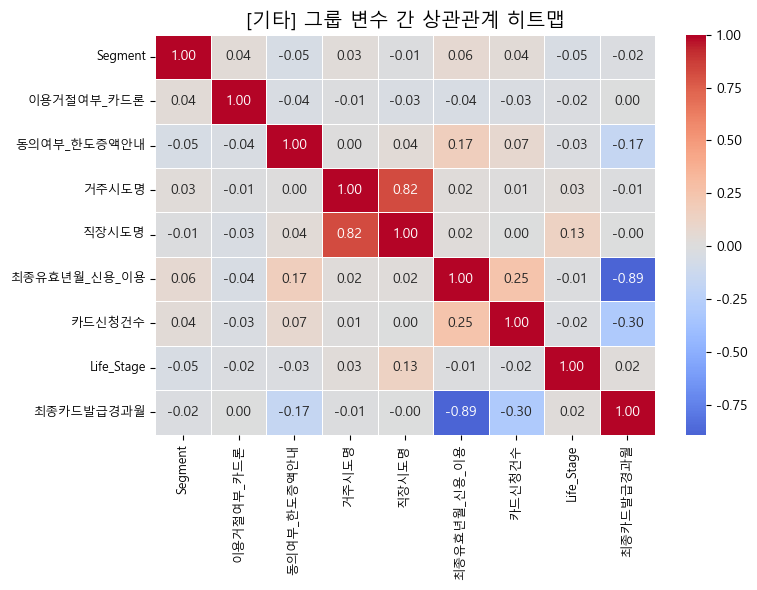

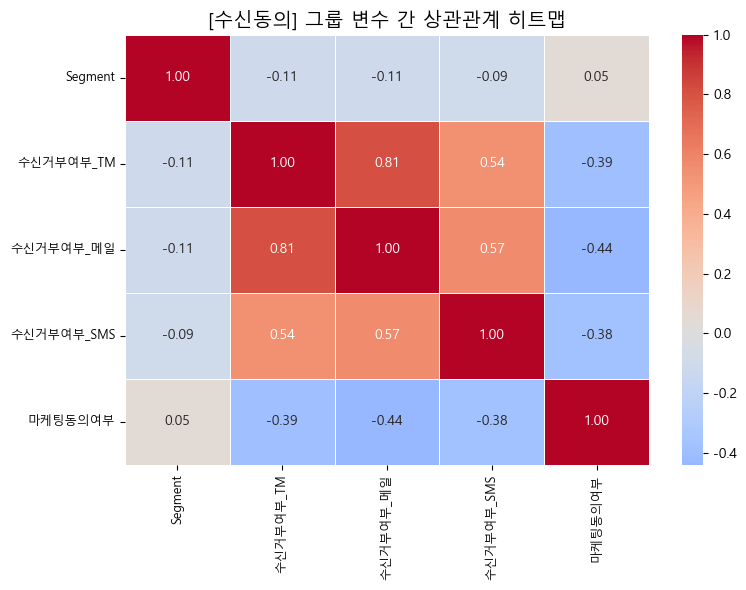

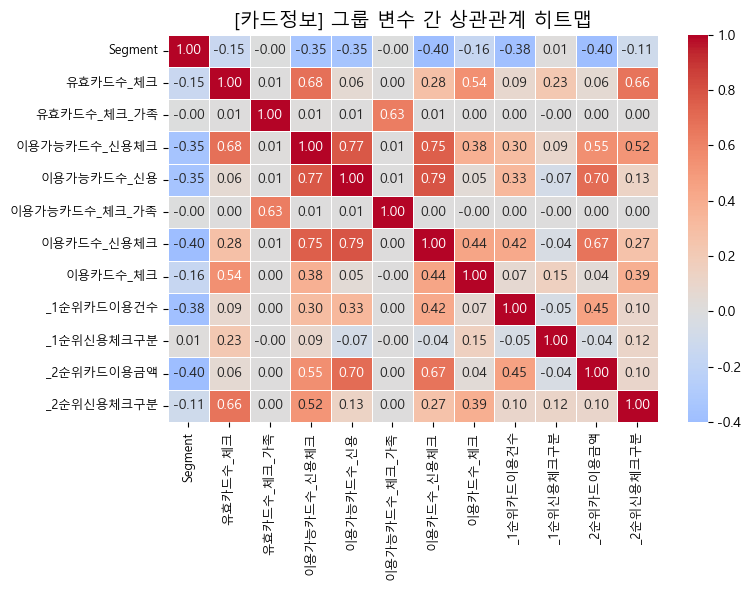

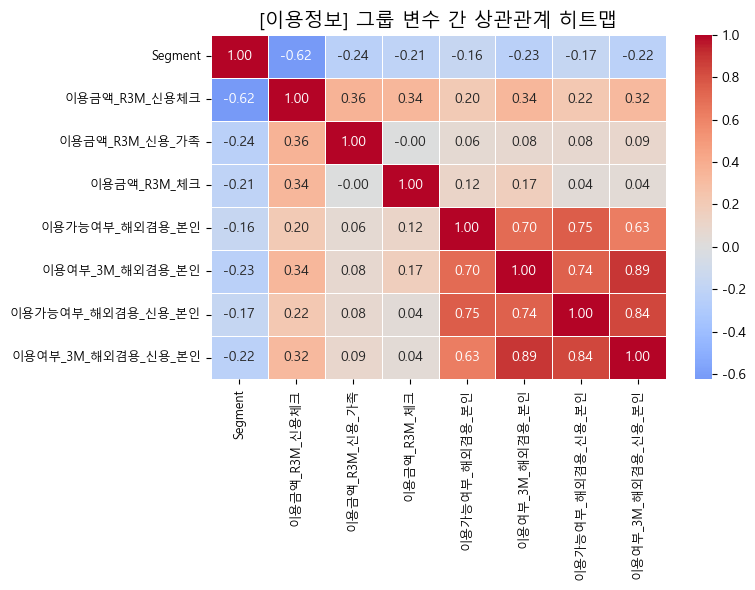

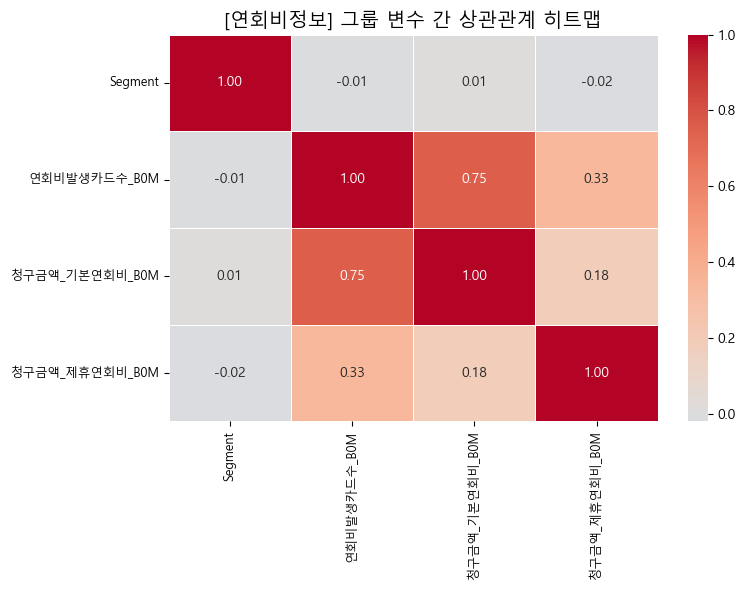

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 그룹 리스트 추출
group_names = grouped_vars['그룹'].unique()

# 2. 그룹별 히트맵 반복
for group in group_names:
    vars_in_group = grouped_vars[grouped_vars['그룹'] == group]['변수명'].tolist()
    
    # Segment 포함해서 히트맵에 같이 보기
    if 'Segment' not in vars_in_group and 'Segment' in encoded_df.columns:
        vars_in_group = ['Segment'] + vars_in_group

    # 상관계수 계산
    corr = encoded_df[vars_in_group].corr()

    # 히트맵 시각화
    plt.figure(figsize=(max(8, len(vars_in_group)*0.5), max(6, len(vars_in_group)*0.5)))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0,
                linewidths=0.5, square=False, cbar=True)

    plt.title(f"[{group}] 그룹 변수 간 상관관계 히트맵", fontsize=14, fontname=font_prop)
    plt.xticks(rotation=90, fontsize=9)
    plt.yticks(fontsize=9)
    plt.tight_layout()
    plt.show()
